In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

%matplotlib inline

In [ ]:
df=pd.read_csv('kc_house_data.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

There are 21 features in this dataset. Out of 21, there is only 1 feature with non numeric value, i.e., date, representing the selling date of a house. 

In [ ]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
df[df['bedrooms'] > 10]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8757,1773100755,20140821T000000,520000.0,11,3.00,3000,4960,2.0,0,0,3,7,2400,600,1918,1999,98106,47.5560,-122.363,1420,4960
15870,2402100895,20140625T000000,640000.0,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


Two houses with more than 10 bedrooms. As for the house with 33 bedrooms, it has only 1 floor and basement. Besides, the sqft living is also small (only 1620 as compared to 3000 for the house with 11 bedroom) which is not likely to have 33 bedrooms. Hence, the record with 33 bedroom is considered as outliner and removed. 

In [ ]:
df = df[df['bedrooms']< 30]

In [ ]:
df.isna().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

The data is clean and structured without any missing or null values. Can proceed to the EDA step to understand and draw some insight from the data.

In [ ]:
from datetime import datetime

df['dateFormatted']=pd.to_datetime(df['date'])

In [ ]:
#sns.set(rc={'figure.figsize':(6,4)}) 
df['year'] = df['dateFormatted'].dt.year
df['month'] = df['dateFormatted'].dt.month
# date_2014 = df[df['dateFormatted'].dt.year == 2014]
# date_2015 = df[df['dateFormatted'].dt.year == 2015]

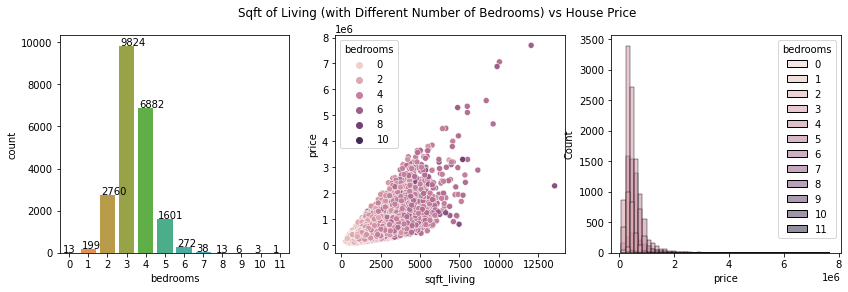

In [ ]:
fig, axs= plt.subplots(1,3, figsize=(14,4))
plt.suptitle('Sqft of Living (with Different Number of Bedrooms) vs House Price')

ax1=sns.countplot(x='bedrooms', data=df,ax=axs[0])
for p in ax1.patches:       
        value = '{0}'.format(p.get_height())
        x = p.get_x() + p.get_width() /15
        y = p.get_y() + p.get_height()+10
        ax1.annotate(value, (x, y))

ax2=sns.scatterplot(x='sqft_living', y='price', data=df, hue='bedrooms',ax=axs[1])
ax3=sns.histplot(x='price', data=df, bins=50, hue='bedrooms',ax=axs[2])
plt.savefig('1.HSP_bedroom.png')

Data shows that the houses sold between 2014 - 2015 are mostly with 2 - 4 bedrooms. Besides, it shows that houses with more bedrooms are wih bigger size on sqft living and able to sell at a higher price.

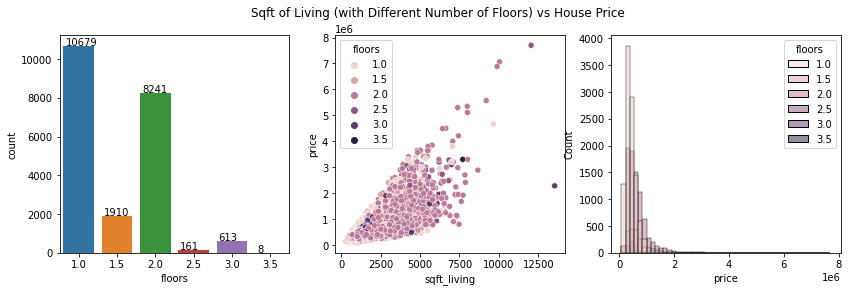

In [ ]:
fig, axs= plt.subplots(1,3, figsize=(14,4))
plt.suptitle('Sqft of Living (with Different Number of Floors) vs House Price')

ax1=sns.countplot(x='floors', data=df,ax=axs[0])
for p in ax1.patches:       
        value = '{0}'.format(p.get_height())
        x = p.get_x() + p.get_width() /15
        y = p.get_y() + p.get_height()+10
        ax1.annotate(value, (x, y))

ax2=sns.scatterplot(x='sqft_living', y='price', data=df, hue='floors',ax=axs[1])
ax3=sns.histplot(x='price', data=df, bins=50, hue='floors',ax=axs[2])
plt.savefig('2.HSP_floors.png')

Data shows that the houses sold between 2014 - 2015 are mostly in between 1 - 2 floors.  Besides, there is no significant finding on the house price with respect to the number of floors. 

In [ ]:
# preprocessing on the yr_renovated to identify if renovation has been done
def renovated(val):
    if val > 0:
        return 'Yes'
    else:
        return 'No'
df['renovated']=df['yr_renovated'].apply(renovated)

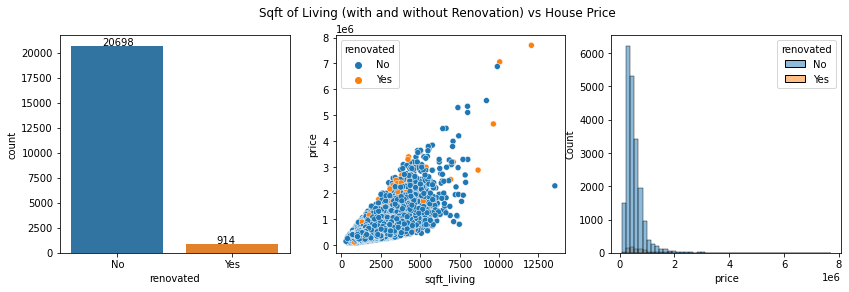

In [ ]:
fig, axs= plt.subplots(1,3, figsize=(14,4))
plt.suptitle('Sqft of Living (with and without Renovation) vs House Price')

ax1=sns.countplot(x='renovated', data=df,ax=axs[0])
for p in ax1.patches:       
        value = '{0}'.format(p.get_height())
        x = p.get_x() + p.get_width() /3
        y = p.get_y() + p.get_height()+10
        ax1.annotate(value, (x, y))

ax2=sns.scatterplot(x='sqft_living', y='price', data=df, hue='renovated',ax=axs[1])
ax3=sns.histplot(x='price', data=df, bins=50, hue='renovated',ax=axs[2])
plt.savefig('3.HSP_renovation.png')
df['renovated'] = df['renovated'].apply(lambda x: 1 if x == 'Yes' else 0)

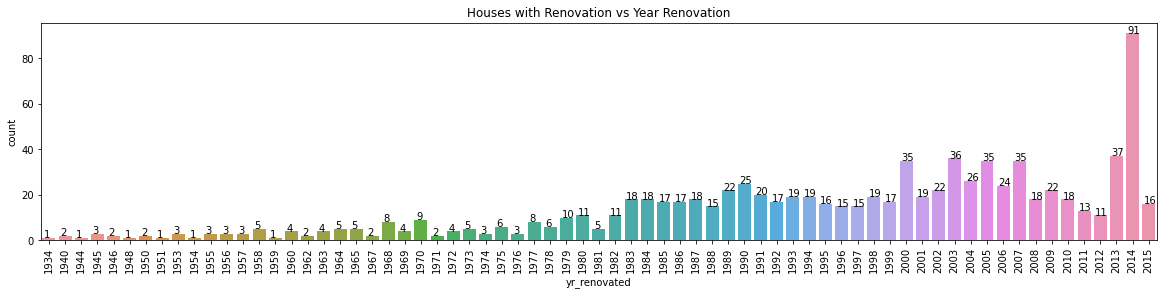

In [ ]:
plt.figure(figsize=(20,4))
df_reno=df[df['renovated']==1]
ax=sns.countplot(x='yr_renovated', data=df_reno)
plt.title('Houses with Renovation vs Year Renovation')
plt.xticks(rotation=90)

for p in ax.patches:       
        value = '{0}'.format(p.get_height())
        x = p.get_x() + p.get_width() /9
        y = p.get_y() + p.get_height()
        ax.annotate(value, (x, y))
plt.savefig('4.HSP_renovationYear.png')

It can be seen that, most of the houses are not renovated (20699 units). There are only 914 houses renovated. It is noted that there are more houses renovated since 1979 and the year with highest number of house renovated is 2014. <br> Also, houses with renovation are able to sell with a higher price.

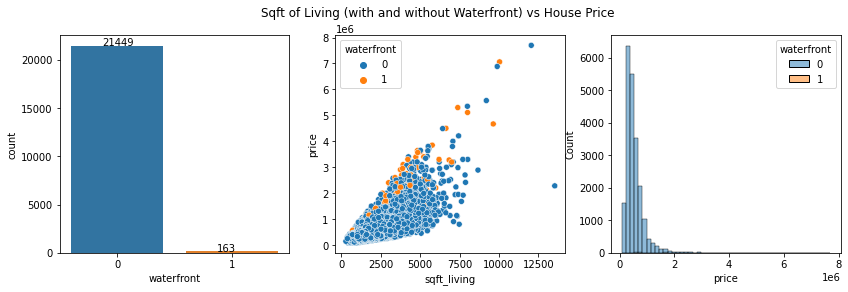

In [ ]:
fig, axs= plt.subplots(1,3, figsize=(14,4))
plt.suptitle('Sqft of Living (with and without Waterfront) vs House Price')

ax1=sns.countplot(x='waterfront', data=df,ax=axs[0])
for p in ax1.patches:       
        value = '{0}'.format(p.get_height())
        x = p.get_x() + p.get_width() /3
        y = p.get_y() + p.get_height()+10
        ax1.annotate(value, (x, y))

ax2=sns.scatterplot(x='sqft_living', y='price', data=df, hue='waterfront',ax=axs[1])
ax3=sns.histplot(x='price', data=df, bins=50, hue='waterfront',ax=axs[2])
plt.savefig('5.HSP_waterfront.png')

There are only 163 houses (out of 21613) with waterfront. In fact, the houses with waterfront are able to sell in a higher price. 

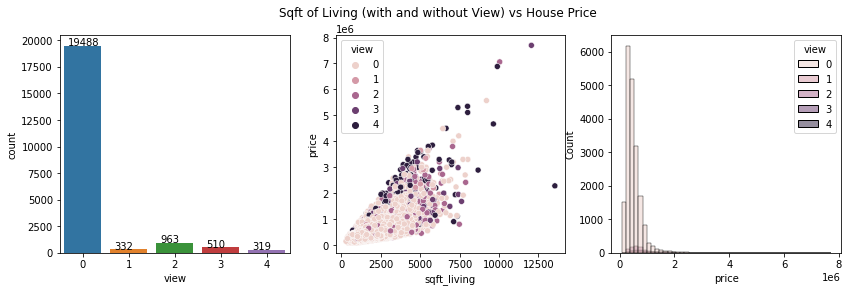

In [ ]:
fig, axs= plt.subplots(1,3, figsize=(14,4))
plt.suptitle('Sqft of Living (with and without View) vs House Price')

ax1=sns.countplot(x='view', data=df,ax=axs[0])
for p in ax1.patches:       
        value = '{0}'.format(p.get_height())
        x = p.get_x() + p.get_width() /10
        y = p.get_y() + p.get_height()+10
        ax1.annotate(value, (x, y))

ax2=sns.scatterplot(x='sqft_living', y='price', data=df, hue='view',ax=axs[1])
ax3=sns.histplot(x='price', data=df, bins=50, hue='view',ax=axs[2])
plt.savefig('6.HSP_view.png')

Data shows that most of the houses are with poor view. Also, it is noted that houses with better view are able to sell at a higher price. 

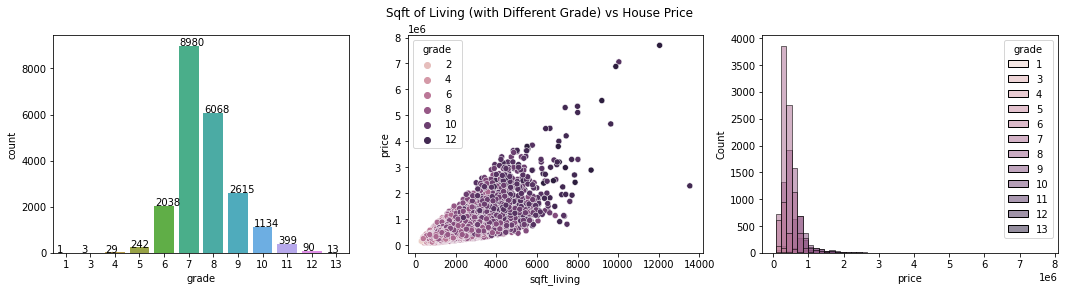

In [ ]:
fig, axs= plt.subplots(1,3, figsize=(18,4))
plt.suptitle('Sqft of Living (with Different Grade) vs House Price')

ax1=sns.countplot(x='grade', data=df,ax=axs[0])
for p in ax1.patches:       
        value = '{0}'.format(p.get_height())
        x = p.get_x() + p.get_width() /30
        y = p.get_y() + p.get_height()+10
        ax1.annotate(value, (x, y))

ax2=sns.scatterplot(x='sqft_living', y='price', data=df, hue='grade',ax=axs[1])
ax3=sns.histplot(x='price', data=df, bins=50, hue='grade',ax=axs[2])
plt.savefig('7.HSP_grade.png')

Data shows that houses built are mostly rate 7 and above. Besides, it also shows that houses with high sqft living are with better grade of construction and design. Thus, the higher the selling price. 

In [ ]:
def roundBathroom(val):
  if(val == 0):
    return 0
  elif (val <= 1):
    return 1
  elif (val <= 2):
    return 2
  elif (val <= 3):
    return 3
  elif (val <= 4):
    return 4
  elif (val <= 5):
    return 5
  elif (val <= 6):
    return 6
  elif (val <= 7):
    return 7
  elif (val <= 8):
    return 8

df['bathrooms']=df['bathrooms'].apply(roundBathroom)

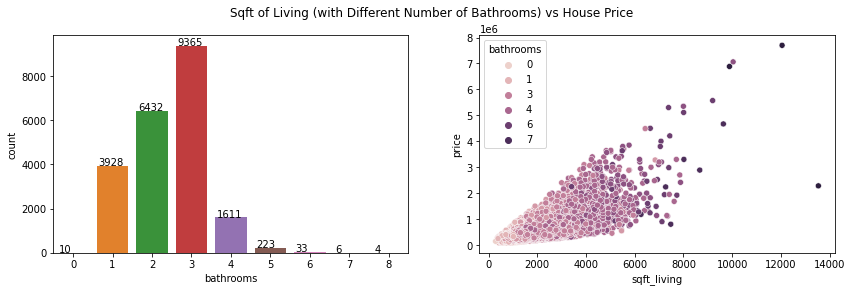

In [ ]:
fig, axs= plt.subplots(1,2, figsize=(14,4))
plt.suptitle('Sqft of Living (with Different Number of Bathrooms) vs House Price')

ax1=sns.countplot(x='bathrooms', data=df,ax=axs[0])
for p in ax1.patches:       
        value = '{0}'.format(p.get_height())
        x = p.get_x() + p.get_width() /20
        y = p.get_y() + p.get_height()+10
        ax1.annotate(value, (x, y))

ax2=sns.scatterplot(x='sqft_living', y='price', data=df, hue='bathrooms',ax=axs[1])
plt.savefig('8.HSP_bathroom.png')

Most of the houses are with 1 - 3 full bathrooms. Besides, the houses with more bathrooms are with higher selling price.

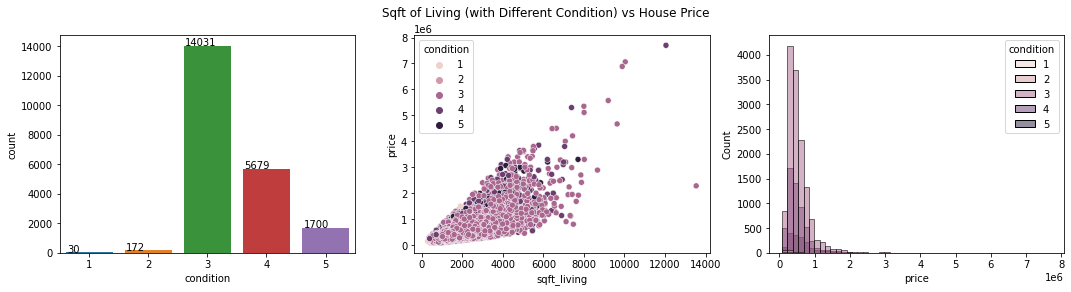

In [ ]:
fig, axs= plt.subplots(1,3, figsize=(18,4))
plt.suptitle('Sqft of Living (with Different Condition) vs House Price')

ax1=sns.countplot(x='condition', data=df,ax=axs[0])
for p in ax1.patches:       
        value = '{0}'.format(p.get_height())
        x = p.get_x() + p.get_width() /30
        y = p.get_y() + p.get_height()+10
        ax1.annotate(value, (x, y))

ax2=sns.scatterplot(x='sqft_living', y='price', data=df, hue='condition',ax=axs[1])
ax3=sns.histplot(x='price', data=df, bins=50, hue='condition',ax=axs[2])
plt.savefig('9.HSP_condition.png')

Data shows that houses with better rating on the condition are able to sell at a higher prices, given the same sqft of living. Also, most of the houses are rated at least 3 and above. 

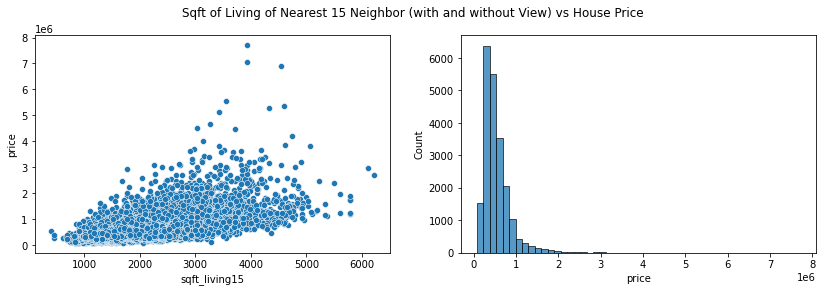

In [ ]:
fig, axs= plt.subplots(1,2, figsize=(14,4))
plt.suptitle('Sqft of Living of Nearest 15 Neighbor (with and without View) vs House Price')

# ax1=sns.countplot(x='view', data=df,ax=axs[0])
# for p in ax1.patches:       
#         value = '{0}'.format(p.get_height())
#         x = p.get_x() + p.get_width() /10
#         y = p.get_y() + p.get_height()+10
#         ax1.annotate(value, (x, y))

ax2=sns.scatterplot(x='sqft_living15', y='price', data=df,ax=axs[0])
ax3=sns.histplot(x='price', data=df, bins=50,ax=axs[1])
plt.savefig('10.HSP_neighbor_view.png')

Data shows that the higher the sqft living of 15 neighbors, the higher the selling price of a house. 

In [ ]:
# preprocessing on the sqft_basement to identify if a house has a basement
df['basement'] = df['sqft_basement'].apply(lambda x: 'Yes' if x > 0 else 'No')

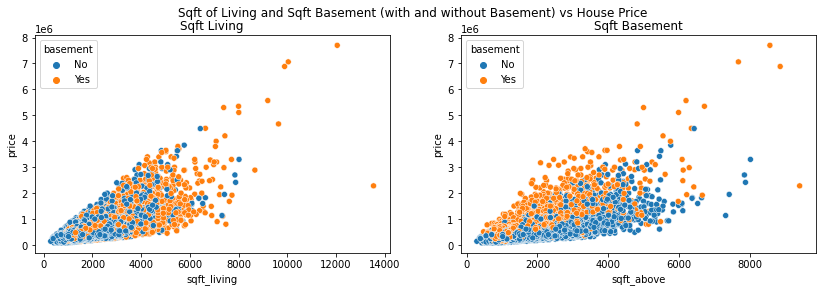

In [ ]:
fig, axs= plt.subplots(1,2, figsize=(14,4))
plt.suptitle('Sqft of Living and Sqft Basement (with and without Basement) vs House Price')

ax1=sns.scatterplot(x='sqft_living', y='price', data=df, hue='basement', ax=axs[0])
ax1.set_title('Sqft Living')

ax2=sns.scatterplot(x='sqft_above', y='price', data=df, hue='basement', ax=axs[1])
ax2.set_title('Sqft Basement')

plt.savefig('11.HSP_sqlivingVSbasement.png')

Data shows that houses with higher sqft living are more likely to have a basement, thus higher the houses prices. Besides, houses with basement are with higher prices, given the same sqft above the ground. 

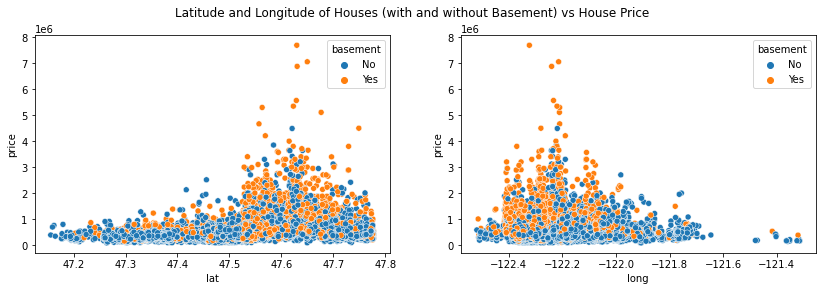

In [ ]:
fig, axs= plt.subplots(1,2, figsize=(14,4))
plt.suptitle('Latitude and Longitude of Houses (with and without Basement) vs House Price')

ax1=sns.scatterplot(x='lat', y='price', data=df, hue='basement', ax=axs[0]) 
ax2=sns.scatterplot(x='long', y='price', data=df, hue='basement', ax=axs[1]) 
plt.savefig('12.HSP_latVSlong(basement).png')
df['basement'] = df['sqft_basement'].apply(lambda x: 1 if x > 0 else 0)

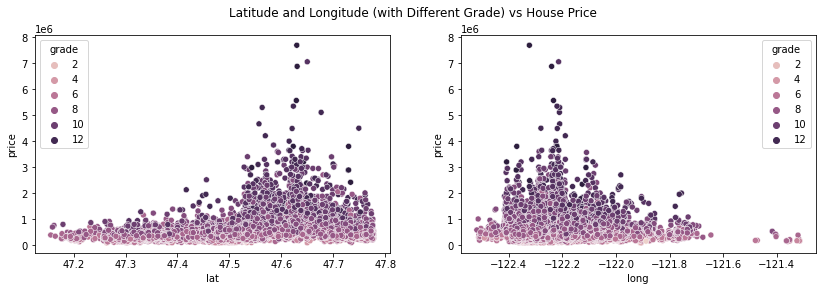

In [ ]:
fig, axs= plt.subplots(1,2, figsize=(14,4))
plt.suptitle('Latitude and Longitude (with Different Grade) vs House Price')

ax1=sns.scatterplot(x='lat', y='price', data=df, hue='grade', ax=axs[0]) 
ax2=sns.scatterplot(x='long', y='price', data=df, hue='grade', ax=axs[1]) 
plt.savefig('13.HSP_latVSlong(grade).png')

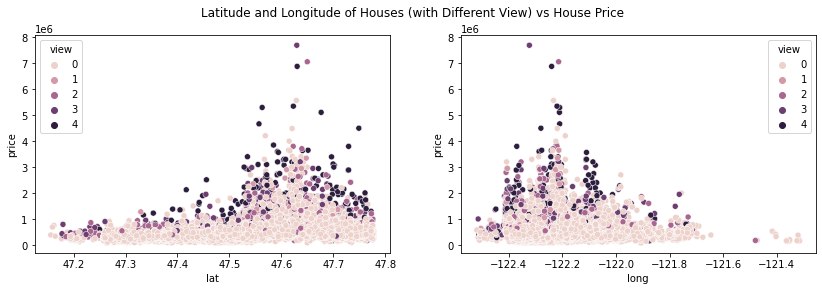

In [ ]:
fig, axs= plt.subplots(1,2, figsize=(14,4))
plt.suptitle('Latitude and Longitude of Houses (with Different View) vs House Price')

ax1=sns.scatterplot(x='lat', y='price', data=df, hue='view', ax=axs[0]) 
ax2=sns.scatterplot(x='long', y='price', data=df, hue='view', ax=axs[1]) 
plt.savefig('14.HSP_latVSlong(view).png')

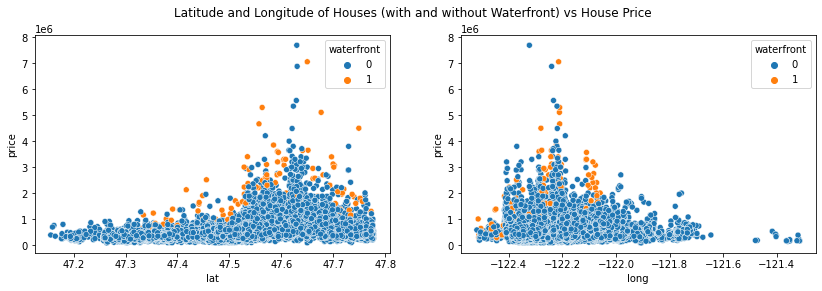

In [ ]:
fig, axs= plt.subplots(1,2, figsize=(14,4))
plt.suptitle('Latitude and Longitude of Houses (with and without Waterfront) vs House Price')

ax1=sns.scatterplot(x='lat', y='price', data=df, hue='waterfront', ax=axs[0]) 
ax2=sns.scatterplot(x='long', y='price', data=df, hue='waterfront', ax=axs[1]) 
plt.savefig('15.HSP_latVSlong(waterfront).png')

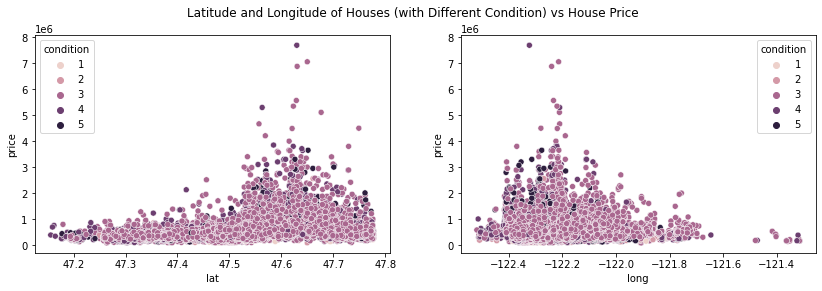

In [ ]:
fig, axs= plt.subplots(1,2, figsize=(14,4))
plt.suptitle('Latitude and Longitude of Houses (with Different Condition) vs House Price')

ax1=sns.scatterplot(x='lat', y='price', data=df, hue='condition', ax=axs[0]) 
ax2=sns.scatterplot(x='long', y='price', data=df, hue='condition', ax=axs[1]) 
plt.savefig('16.HSP_latVSlong(condition).png')

Data shows that houses that are located at latitude of 47.5 to 47.8 and  longitude of -122.4 to -122 are with higher prices, better grade (level of construction and design), view and condition of the properties, and with waterfront and basement.  

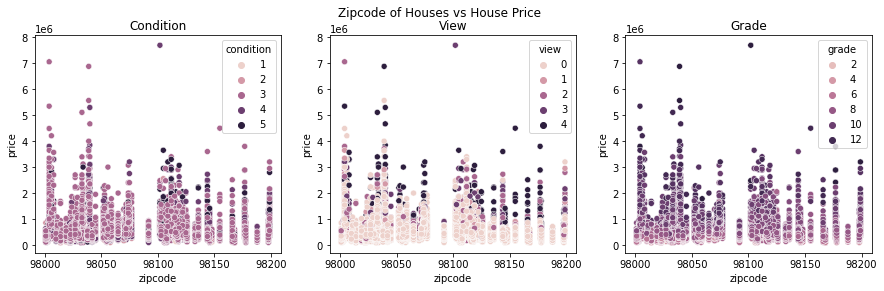

In [ ]:
fig, axs= plt.subplots(1,3, figsize=(15,4))
plt.suptitle('Zipcode of Houses vs House Price')

ax1=sns.scatterplot(x='zipcode', y='price', data=df, hue='condition', ax=axs[0]) 
ax1.set_title('Condition')
ax2=sns.scatterplot(x='zipcode', y='price', data=df, hue='view', ax=axs[1]) 
ax2.set_title('View')
ax3=sns.scatterplot(x='zipcode', y='price', data=df, hue='grade', ax=axs[2]) 
ax3.set_title('Grade')

plt.savefig('17.HSP_zipcode.png')

Given the same zipcode, the better the condition, grade and view of a house, the higher the selling price. 

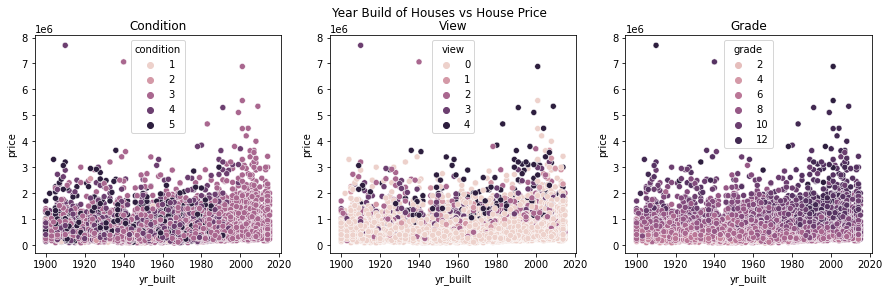

In [ ]:
fig, axs= plt.subplots(1,3, figsize=(15,4))
plt.suptitle('Year Build of Houses vs House Price')

ax1=sns.scatterplot(x='yr_built', y='price', data=df, hue='condition', ax=axs[0]) 
ax1.set_title('Condition')
ax2=sns.scatterplot(x='yr_built', y='price', data=df, hue='view', ax=axs[1]) 
ax2.set_title('View')
ax3=sns.scatterplot(x='yr_built', y='price', data=df, hue='grade', ax=axs[2]) 
ax3.set_title('Grade')

plt.savefig('18.HSP_yrbuilt.png')

Suprisingly, houses built before year 2000 are with better condition. Besides, the many houses that are built after 1980 are of better quality. <br> As for the view of the houses, the better the view, the higher the selling price regardless of the year built of the houses. 

In [ ]:
def Location_extractor(Raw_Str):
    preProcess = Raw_Str.split(',')
    lat =  float(preProcess[0])
    long = float(preProcess[1])
    return (lat, long)

In [ ]:
#location of renovated houses
unique_locations_house = df_reno['location'].value_counts()
unique_locations_house

#RH - Renovated House
RH_index = pd.DataFrame({"Raw_String" : unique_locations_house.index, 
                         "ValueCount":unique_locations_house}) 
RH_index.reset_index(inplace=True)
RH_index=RH_index.drop(columns='index')
#RH_index.head()

RH_index['LocationCoord'] = RH_index['Raw_String'].apply(Location_extractor)
RH_index  = RH_index.drop(columns=['Raw_String'], axis = 1)
#RH_index['LocationCoord']

renovated_house_pp = folium.Map(location=[47.4957,-122.352],zoom_start=13)

for i in range(908):
    lat = RH_index['LocationCoord'].iloc[i][0]
    long = RH_index['LocationCoord'].iloc[i][1]
    radius = RH_index['ValueCount'].iloc[i] / 3
    
    if RH_index['ValueCount'].iloc[i] > 30:
        color = "#FF4500"
    else:
        color = "#008080"
    
    popup_text = """Latitude : {}<br>
                Longitude : {}<br>
                Peace Disruptions : {}<br>"""
    popup_text = popup_text.format(lat,
                               long,
                               RH_index['ValueCount'].iloc[i]
                               )
    folium.CircleMarker(location = [lat, long], popup= popup_text,radius = radius, color = color, fill = True).add_to(renovated_house_pp)

folium.TileLayer('cartodbpositron').add_to(renovated_house_pp)
renovated_house_pp

It can be seen that, most of the renovated are waterside houses.

In [ ]:
unique_locations_all = df['location'].value_counts()
unique_locations_all

#all - for all Houses
all_index = pd.DataFrame({"Raw_String" : unique_locations_all.index, 
                         "ValueCount":unique_locations_all}) 
all_index.reset_index(inplace=True)
all_index=all_index.drop(columns='index')
#all_index.head()

all_index['LocationCoord'] = all_index['Raw_String'].apply(Location_extractor)
all_index  = all_index.drop(columns=['Raw_String'], axis = 1)
#all_index['LocationCoord']

all_house_pp = folium.Map(location=[47.6647,-122.2839],zoom_start=13)

for i in range(19999):
    lat = all_index['LocationCoord'].iloc[i][0]
    long = all_index['LocationCoord'].iloc[i][1]
    radius = all_index['ValueCount'].iloc[i] / 3
    
    if all_index['ValueCount'].iloc[i] > 30:
        color = "#FF4500"
    else:
        color = "#008080"
    
    popup_text = """Latitude : {}<br>
                Longitude : {}<br>
                Peace Disruptions : {}<br>"""
    popup_text = popup_text.format(lat,
                               long,
                               all_index['ValueCount'].iloc[i]
                               )
    folium.CircleMarker(location = [lat, long], popup= popup_text,radius = radius, color = color, fill = True).add_to(all_house_pp)

folium.TileLayer('cartodbpositron').add_to(all_house_pp)

all_house_pp

In [ ]:
# def yearBuilt(yr):
#   if (yr <= 1914):
#     return '> 100'
#   elif ((yr >= 1915) & (yr <= 1939) ):
#     return '76 - 100'
#   elif ((yr >= 1940) & (yr <= 1964 )):
#     return '51 - 75'
#   elif ((yr >= 1965) & (yr <= 1989) ):
#     return '26 - 50'
#   elif ((yr >= 1990) & (yr <= 2004) ):
#     return '11 - 25'
#   elif ((yr >= 2005) & (yr <= 2009) ):
#     return '6 - 10'
#   else:
#     return '1 - 5' 

# df['built'] = df['yr_built'].apply(yearBuilt)
# label=['1 - 5', '6 - 10','11 - 25', '26 - 50', '51 - 75', '76 - 100', '> 100']
# sns.countplot(x='built',data=df, order=label)

In [ ]:
df_sales=df.groupby(['year','month'])['id'].count().reset_index()

In [ ]:
df_sales_pt=df_sales.pivot(index='year',columns='month',values='id')

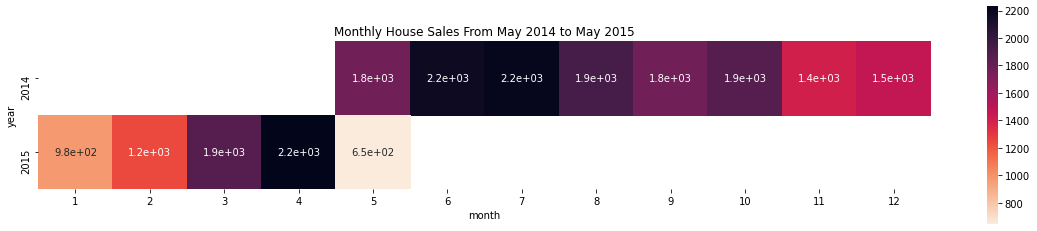

In [ ]:
# plt.figure(figsize=(10,7))
# sns.heatmap(df.corr(), annot=False, cmap='vlag')
plt.figure(figsize=(20,4))
sns.heatmap(df_sales_pt, cmap="rocket_r", annot=True, square=True)
plt.title('Monthly House Sales From May 2014 to May 2015')
plt.savefig('19.heatmap_monthlySale.png')

House sales in 2014 is better than 2015, and there are at least 1500 units sold per month in 2014. 

In [ ]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
#df=pd.read_csv('kc_house_data.csv')
scaler = MinMaxScaler()
df[['price','sqft_living','sqft_basement','sqft_above', 'sqft_living15', 'lat', 'long']] = scaler.fit_transform(df[['price','sqft_living','sqft_basement','sqft_above', 'sqft_living15','lat','long']])


In [ ]:

#columns = ['sqft_living','sqft_basement','sqft_above','bedrooms','waterfront','condition','bathrooms','grade','view']
columns=['basement','sqft_living','grade', 'sqft_above', 'sqft_living15','bathrooms','view','lat','waterfront','yr_built','bedrooms','renovated','long','zipcode','condition']
X = df[columns]
y = df['price']

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_predict=lr_model.predict(X_test)

In [ ]:
print ('Coefficients:', lr_model.coef_)
print ('Intercept:', lr_model.intercept_)
print ('Model performance:', lr_model.score(X,y))

print('Linear Regression Train Score is : {0:.2f}'.format(lr_model.score(X_train, y_train)*100))
print('Linear Regression Test Score is : {0:.2f}'.format(lr_model.score(X_test, y_test)*100))
print('Linear Regression Test R_Square Score is : {0:.2f}'.format(r2_score(y_test, y_predict)*100))

Coefficients: [-4.95298302e-04  2.79446285e-01  1.25724111e-02  3.86285166e-02
  1.15283247e-02  3.20989720e-03  7.23723797e-03  5.03339050e-02
  7.85534578e-02 -3.25375932e-04 -4.80245780e-03  5.85210746e-03
 -3.59475147e-02 -7.44312335e-05  3.45018419e-03]
Intercept: 7.829507650819289
Model performance: 0.6979898596161
Linear Regression Train Score is : 69.95
Linear Regression Test Score is : 69.13
Linear Regression Test R_Square Score is : 69.13


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()

rf_model.fit(X_train, y_train)
y_predict=rf_model.predict(X_test)

In [ ]:
print ('Model performance:', rf_model.score(X,y))

print('Random Forest Regressor Train Score is : {0:.2f}'.format(rf_model.score(X_train, y_train)*100))
print('Random Forest Regressor Test Score is : {0:.2f}'.format(rf_model.score(X_test, y_test)*100))
print('Random Forest Regressor Test R_Square Score is : {0:.2f}'.format(r2_score(y_test, y_predict)*100))

Model performance: 0.9641776512131477
Random Forest Regressor Train Score is : 98.19
Random Forest Regressor Test Score is : 88.80
Random Forest Regressor Test R_Square Score is : 88.80


In [ ]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75, colsample_bytree=1, max_depth=7)

xgb_model.fit(X_train, y_train)
y_predict=xgb_model.predict(X_test)

[07:12:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
print ('Model performance:', xgb_model.score(X,y))

print('XGBoost Regressor Train Score is : {0:.2f}'.format(xgb_model.score(X_train, y_train)*100))
print('XGBoost Regressor Test Score is : {0:.2f}'.format(xgb_model.score(X_test, y_test)*100))
print('XGBoost Regressor Test R_Square Score is : {0:.2f}'.format(r2_score(y_test, y_predict)*100))

Model performance: 0.9412981358234809
XGBoost Regressor Train Score is : 95.26
XGBoost Regressor Test Score is : 89.27
XGBoost Regressor Test R_Square Score is : 89.27
